## Lets examine iRF results in R

In [17]:
library(yaml)
source('R_irf_benchmarks_utils.R')

In [18]:
# load output; its contained in a variable called irf_bm
load('./output/iRF_mod01_out.RData')

# recall specs
specs <- yaml.load_file('./specs/iRF_mod01.yaml')

## Plot some metrics

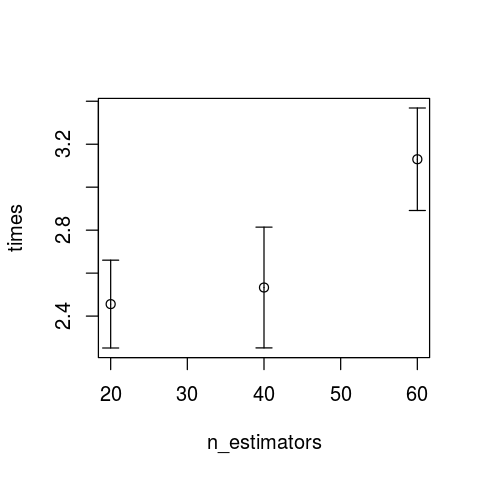

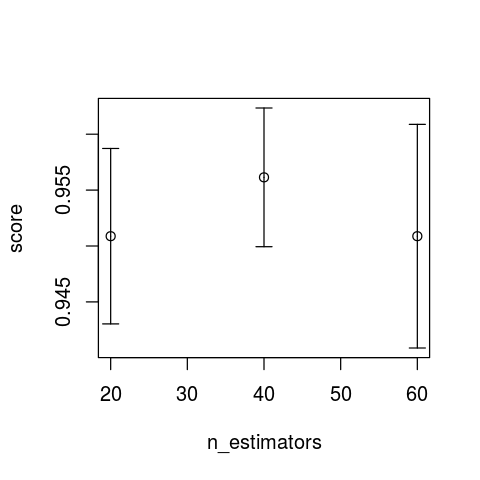

In [19]:
# calling a helper function in the file R_irf_benchmarks_utils.R
# the third argument is the x-axis, fourth argument is the y-axis
plot_bm(irf_bm, specs, 'n_estimators', 'times')
plot_bm(irf_bm, specs, 'n_estimators', 'score')

## Lets look at feature importances from the last iteration of iRF

The results printed in the notebook below are for n_estimators = 60

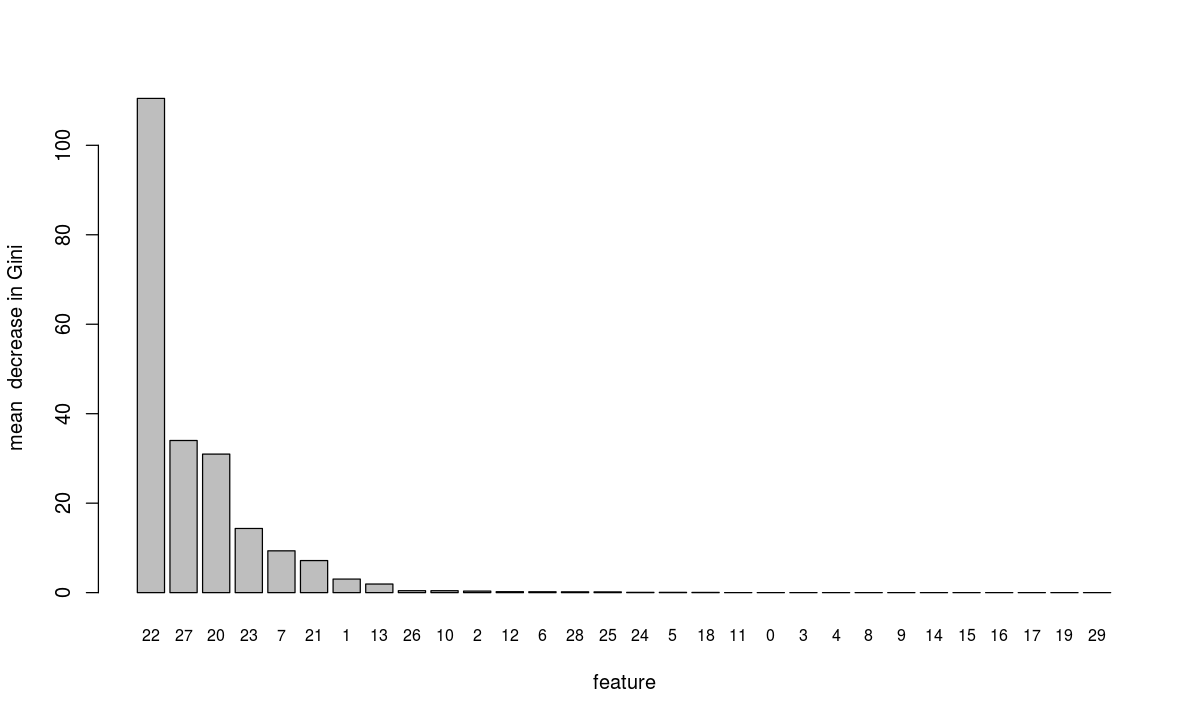

In [41]:
feature_importances <- irf_bm[[3]][['feature_importance']][[1]]
feature_importances_rank_idx <- order(feature_importances, decreasing = TRUE)

options(repr.plot.width=10, repr.plot.height=6)
barplot(feature_importances[feature_importances_rank_idx], names.arg=feature_importances_rank_idx-1, cex.names=.8, 
       xlab = 'feature', ylab = 'mean  decrease in Gini')

In [45]:
# lets look at feature importances across all the trials
for(i in 1:specs$n_trials){
    feature_importances <- irf_bm[[3]][['feature_importance']][[i]]
    feature_importances_rank_idx <- order(feature_importances, decreasing = TRUE) - 1
    cat(paste('trial', i, ': ', sep = ''), feature_importances_rank_idx[1:5], '\n')
}

trial1:  22 27 20 23 7 
trial2:  22 27 23 20 7 
trial3:  22 27 23 7 20 
trial4:  22 27 23 20 21 
trial5:  22 27 23 20 21 


## Examine stability scores

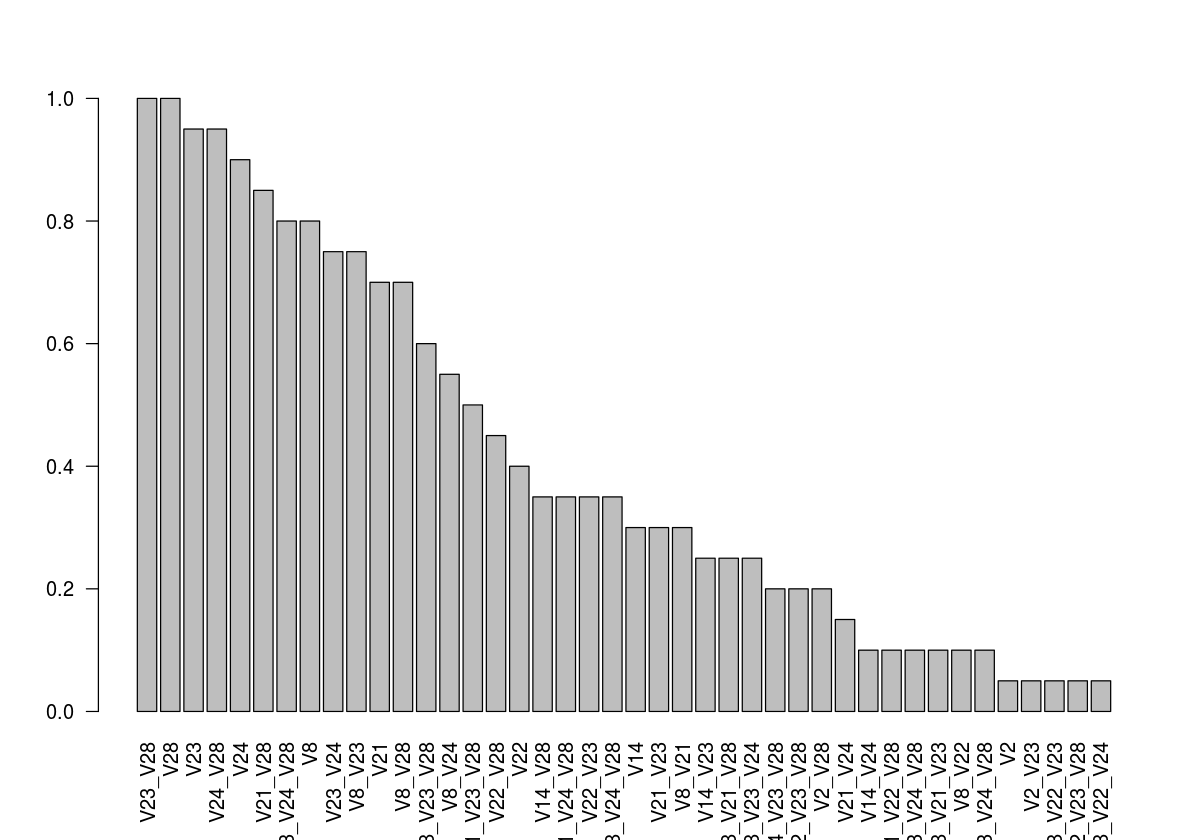

In [54]:
# plot stability scores from one trial

stability <- irf_bm[[3]][['stability_all']][[1]]

options(repr.plot.width=10, repr.plot.height=7)
barplot(stability, las=2)

In [59]:
# examing stability scores across all trials
for(i in 1:specs$n_trials){
    stability <- irf_bm[[3]][['stability_all']][[i]]
    interactions <-names(stability)
    cat(paste('trial', i, ': ', sep = ''), interactions[1:5], '\n')
}

trial1:  V23_V28 V28 V23 V24_V28 V24 
trial2:  V23 V23_V28 V24 V28 V24_V28 
trial3:  V23_V28 V23 V28 V24_V28 V23_V24 
trial4:  V23_V28 V28 V24_V28 V21_V28 V23 
trial5:  V23_V28 V28 V23 V24_V28 V23_V24 
